# Step 1: Importing Libraries

Import necessary Python libraries like Pandas, NumPy, Seaborn, Matplotlib, and scikit-learn modules.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Step 2: Loading Databases

Load the datasets (ML case Study.csv, Colleges.csv, and cities.csv) using Pandas read_csv() function.

In [2]:
# Loading Databases
df = pd.read_csv('ML case Study.csv', header=0)
college = pd.read_csv('Colleges.csv', header=0)
city = pd.read_csv('cities.csv', header=0)

# Step 3: Checking the Data
    
Use df.head() to display the first few rows of the primary dataset to understand its structure.

Use df.info() to check for missing values and get a summary of the dataframe.

In [3]:
# Checking the first few rows of the dataframe
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
# Checking for missing values in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


# Step 4: Visualizing Outliers

Create pair plots using Seaborn's pairplot() to visualize relationships between multiple variables and check for outliers.

C:\Users\khush\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


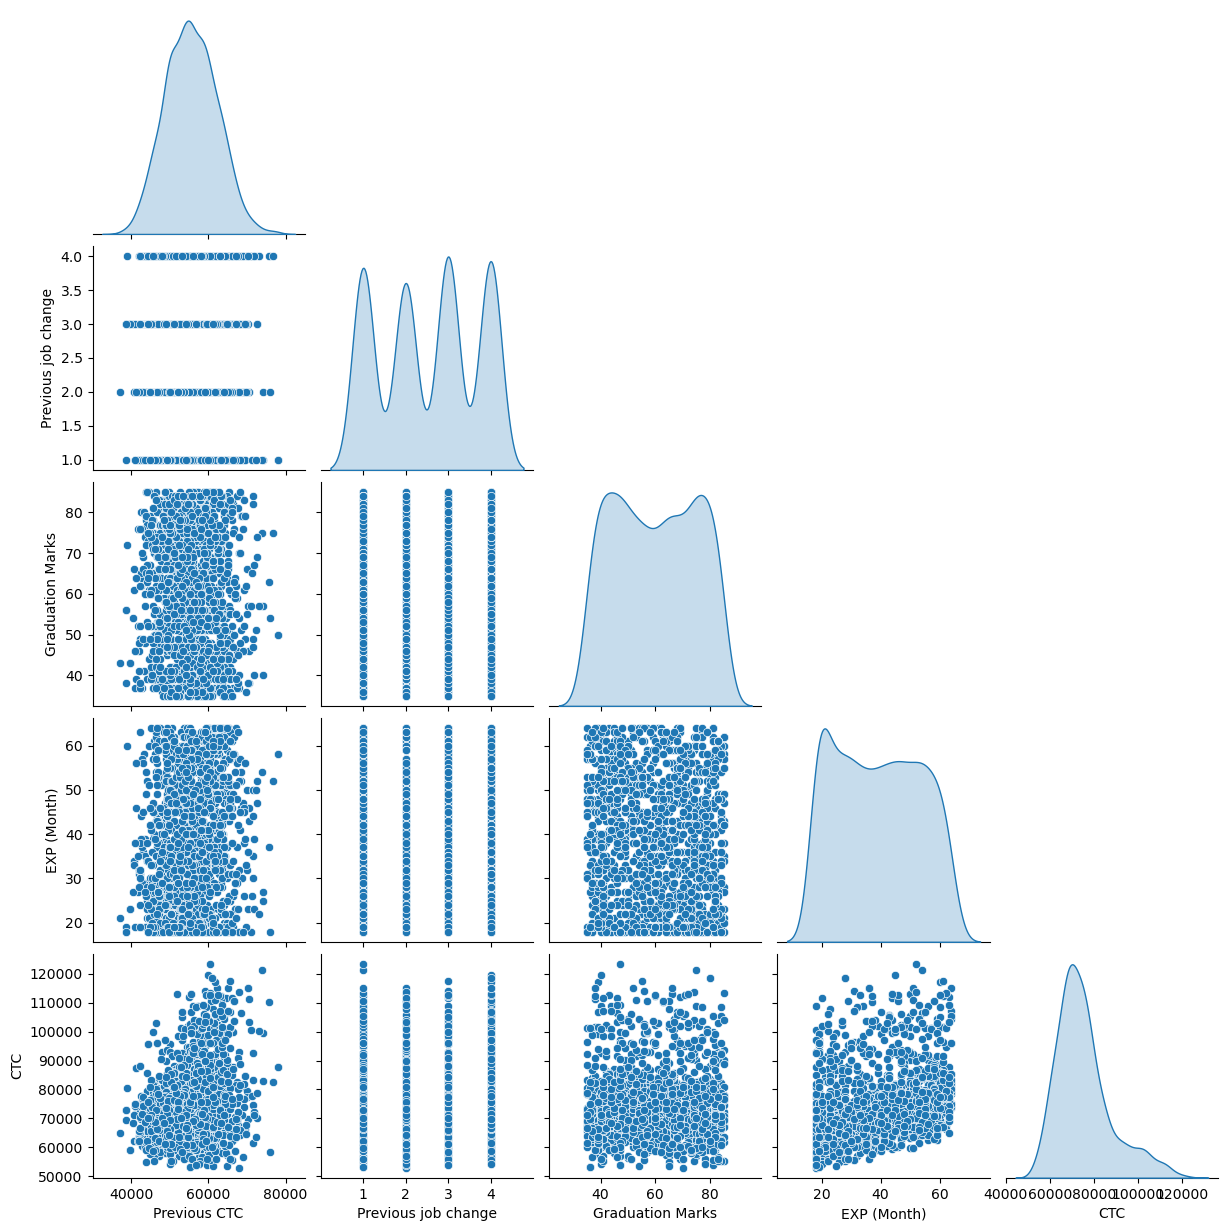

In [5]:
# Visualizing outliers using pairplot
sns.pairplot(df, diag_kind='kde', corner=True)

# Step 5: Handling Categorical Variables

Convert categorical variables in the dataset (College and City) in
to numerical form using dummy variables (pd.get_dummies()).

In [6]:
# Handling categorical variables by creating dummy variables
Tier1 = college['Tier 1'].tolist()
Tier2 = college['Tier 2'].tolist()
Tier3 = college['Tier 3'].tolist()

for item in df.College:
    if item in Tier1:
        df["College"].replace(item, 1, inplace=True)
    elif item in Tier2:
        df["College"].replace(item, 2, inplace=True)
    elif item in Tier3:
        df["College"].replace(item, 3, inplace=True)

Metro_City = city['Metrio City'].tolist()
Non_Metro_City = city['non-metro cities'].tolist()

for item in df.City:
    if item in Metro_City:
        df["City"].replace(item, 'Metro', inplace=True)
    elif item in Non_Metro_City:
        df["City"].replace(item, 'Non_Metro', inplace=True)

In [7]:
# Creating dummy variables for categorical columns
df = pd.get_dummies(df, columns=['College', 'City', 'Role'], drop_first=True, dtype=int)
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_2,College_3,City_Non_Metro,Role_Manager
0,55523.0,3,66,19,71406.58,1,0,1,1
1,57081.0,1,84,18,68005.87,1,0,1,0
2,60347.0,2,52,28,76764.02,0,1,1,0
3,49010.0,2,81,33,82092.39,0,1,1,0
4,57879.0,4,74,32,73878.10,0,0,1,0


# Step 6: Normalizing Numerical Columns

Normalize numerical columns in the dataset to a standard scale using Min-Max normalization.

In [8]:
# Normalizing numerical columns
numerical_cols = ['Previous CTC', 'Previous job change', 'Graduation Marks', 'EXP (Month)', 'CTC']

for col in numerical_cols:
    max_value = df[col].max()
    min_value = df[col].min()
    df[col] = (df[col] - min_value) / (max_value - min_value)

# Step 7: Checking Feature Correlation
    
Calculate the correlation between different features using df.corr() to identify potential relationships between variables.

In [9]:
# Checking for correlation between features
df.corr()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_2,College_3,City_Non_Metro,Role_Manager
Previous CTC,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.010947,0.042438,-0.004644,0.012321
Previous job change,0.005756,1.000000,0.019267,0.023488,0.011370,0.004271,-0.050794,-0.051670,-0.017150
Graduation Marks,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.018419,0.012021,0.018616,0.017858
EXP (Month),0.119163,0.023488,-0.057061,1.000000,0.301115,-0.014558,0.017427,0.023613,-0.026751
CTC,0.258000,0.011370,-0.005450,0.301115,1.000000,0.012346,-0.032149,0.020365,0.621311
College_2,-0.010947,0.004271,-0.018419,-0.014558,0.012346,1.000000,-0.465741,-0.022917,-0.004865
College_3,0.042438,-0.050794,0.012021,0.017427,-0.032149,-0.465741,1.000000,0.024288,-0.010706
City_Non_Metro,-0.004644,-0.051670,0.018616,0.023613,0.020365,-0.022917,0.024288,1.000000,0.048671
Role_Manager,0.012321,-0.017150,0.017858,-0.026751,0.621311,-0.004865,-0.010706,0.048671,1.000000


# Step 8: Data Splitting
    
Split the dataset into independent variables (X) and the dependent variable (y) for model training and evaluation using scikit-learn's train_test_split().

In [10]:
# Splitting the data into independent variables (X) and dependent variable (y)
X = df.drop('CTC', axis=1)
y = df['CTC']

In [11]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 9: Standardization

Standardize the features using StandardScaler() to center the data around zero mean and scale to unit variance.

In [12]:
# Standardizing the features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Step 10: Model Initialization and Training

Initialize various regression models (Linear Regression, Ridge Regression, Lasso Regression, Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boosting, XGBoost).
Train each model using the training data (fit() method).

In [13]:
# Initializing and fitting different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.5),
    'Lasso Regression': Lasso(alpha=0.5),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Bagging': BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42),
    'adaboost_regressor': AdaBoostRegressor(n_estimators=100, learning_rate=1, random_state=42),
    'gradient_boosting_regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=1, random_state=42),
    'xgb_regressor': XGBRegressor(n_estimators=100, learning_rate=1, random_state=42)
}

# Step 11: Model Evaluation
For each model, make predictions on the test data and calculate metrics like Mean Squared Error (MSE) and R-squared score (mean_squared_error(), r2_score()).
Print the evaluation metrics for each model.

In [14]:
# Training and evaluating each model
for model_name, model in models.items():
    if model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_s, y_train)
        y_pred = model.predict(X_test_s)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared Score:", r2)
    print("=" * 50)

Model: Linear Regression
Mean Squared Error (MSE): 0.013873205954323538
R-squared Score: 0.5366674761766204
Model: Ridge Regression
Mean Squared Error (MSE): 0.013873618703138985
R-squared Score: 0.5366536913347464
Model: Lasso Regression
Mean Squared Error (MSE): 0.029944331018874525
R-squared Score: -7.038826191463343e-05
Model: Decision Tree
Mean Squared Error (MSE): 0.018757524034680142
R-squared Score: 0.37354271389897864
Model: Random Forest
Mean Squared Error (MSE): 0.010367897939708461
R-squared Score: 0.6537365382619973
Model: Bagging
Mean Squared Error (MSE): 0.010324611765358675
R-squared Score: 0.6551821949093632
Model: adaboost_regressor
Mean Squared Error (MSE): 0.012406038552659229
R-squared Score: 0.58566742451752
Model: gradient_boosting_regressor
Mean Squared Error (MSE): 0.015023609020960314
R-squared Score: 0.4982467133022064
Model: xgb_regressor
Mean Squared Error (MSE): 0.0151598801653097
R-squared Score: 0.49369557685663057


# Step 12: Best Model Selection

Evaluating and observing various model's mse and r - scored values, Random forest is chose to be the best model as it have less mse and more r - squared score.

In [15]:
# Evaluating the Random Forest model separately for comparison
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 0.010367897939708461
R-squared Score: 0.6537365382619973


# Step 13: Hyperparameter Tuning  

To find the optimal hyperparameters for the Random Forest model, methods like Grid Search or Random Search are used in combination with cross-validation for implementing hyperparameter tuning.

In [16]:
# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Perform Grid Search with cross-validation (let's say k=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X, y)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Perform cross-validation using the best model
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
avg_mse = np.mean(mse_scores)

# Print the cross-validation results
print("Cross-Validation Mean Squared Error (MSE) Scores:")
print(mse_scores)
print("Average MSE:", avg_mse)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Cross-Validation Mean Squared Error (MSE) Scores:
[0.00680891 0.0136516  0.0129882  0.01425533 0.00731279]
Average MSE: 0.011003368242443709


# Questions

Q 1. Your views about the problem statement?

The problem statement provides a good dataset and a clear objective, it revolves around predicting salaries based
on various features like college tier, city type, previous CTC, experience, etc.
It's a classic regression problem where we aim to create a model that accurately predicts salaries for new hires.

Q 2. What will be your approach to solving this task?

The approach involves several key steps:

1.) Data Loading and Understanding: Load the datasets, examine their structure, and handle any missing values.

2.) Data Preprocessing: Address outliers, handle categorical variables by creating dummy variables, and normalize numerical columns.

3.) Model Training and Evaluation: Utilize various regression models (Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Bagging, AdaBoost, Gradient Boosting, XGBoost), splitting the data, standardization, training the models, and evaluating their performance using Mean Squared Error (MSE) and R-squared score.

4.) Model Comparison and Selection: Compare the performance of different models and select the best-performing model based on evaluation metrics.

5.) Hyper Parameter Tuning: The objective of hyperparameter tuning through Grid Search is to identify the set of hyperparameters that optimize the model's performance on unseen data, enhancing its ability to generalize and make accurate predictions.

Q 3. What were the available ML model options you had to perform this task?

For regression tasks like this, we have a variety of models to choose from:

1.) Linear Regression

2.) Ridge Regression

3.) Lasso Regression

4.) Decision Tree

5.) Random Forest

6.) Bagging

7.) Gradient Boosting models (e.g.,ADABoost, XGBoost, Gradient)

Q 4. Which model’s performance is best and what could be the possible reason for that?

Random Forest is the best-performing model, the possible reason for its superior performance 
could be attributed to several factors:

Reasons for Random Forest's Superior Performance:
Ensemble Technique: Random Forest is an ensemble learning method that builds multiple decision trees and merges their 
predictions, which often leads to better generalization and robustness against overfitting compared to individual decision 
trees.

Handling Non-Linearity: Random Forest can handle non-linear relationships between features and the target variable 
efficiently. It's capable of capturing complex interactions among features, which might exist in the dataset.

Feature Importance: Random Forest provides a measure of feature importance, enabling the identification of influential 
features for predicting CTC. It tends to select the most relevant features for decision-making, which contributes to its 
predictive accuracy.

Robustness to Noise: Random Forest is less susceptible to noise and outliers compared to some other models like linear 
regression. Its robustness can lead to better performance, especially when dealing with datasets containing noisy or less-
clean data.


Q 5. What steps can you take to improve this selected model’s performance even further?

To enhance the performance of the selected model (Since Random Forest is the best-performing):

1.) Hyperparameter Tuning: Use techniques like Grid Search or Random Search to fine-tune the hyperparameters of the Random 
Forest model.

2.) Feature Engineering: Explore creating new features or modifying existing ones to provide more predictive power.

3.) Ensemble Methods: Experiment with ensemble techniques like stacking or blending different models to improve overall 
performance.

4.) Cross-Validation: Implement robust cross-validation techniques to ensure the model's generalization and prevent overfitting.